In [22]:
import numpy as np
import seaborn as sns
#from scipy.stats import boxcox
from sklearn.preprocessing import QuantileTransformer,PowerTransformer,FunctionTransformer

In [17]:
data=np.random.exponential(2,10000)
#data=np.random.randint(0,50,size=10000)
right_skewed_data=np.power(data,.95)#positive
right_skewed_data_reshape=right_skewed_data.reshape((-1,1))


<Axes: ylabel='Count'>

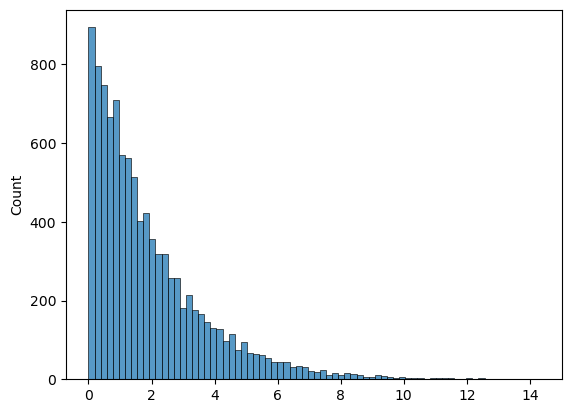

In [4]:
sns.histplot(right_skewed_data)

Log Transformation

<Axes: ylabel='Count'>

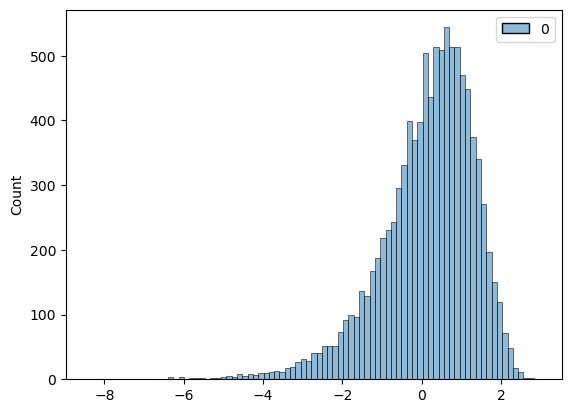

In [30]:
func_trans=FunctionTransformer(func=np.log,inverse_func=np.exp)
log_data=func_trans.fit_transform(right_skewed_data_reshape)

inverse_log=func_trans.inverse_transform(log_data)
sns.histplot(log_data)

Square-root Transformation

<Axes: ylabel='Count'>

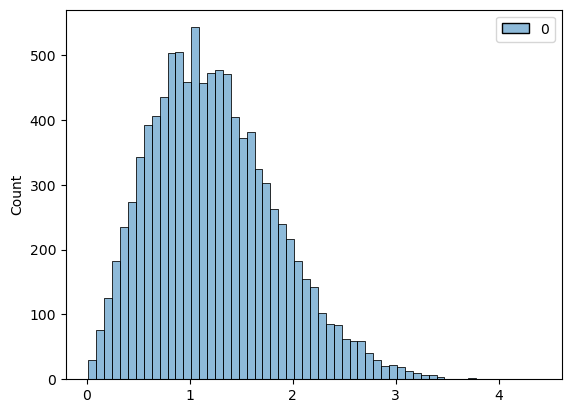

In [29]:
func_trans1=FunctionTransformer(func=np.sqrt,inverse_func=np.square)
sqrt_data=func_trans1.fit_transform(right_skewed_data_reshape)

inverse_sqrt=func_trans1.inverse_transform(sqrt_data)

sns.histplot(sqrt_data)

Box-Cox Transformation

<Axes: ylabel='Count'>

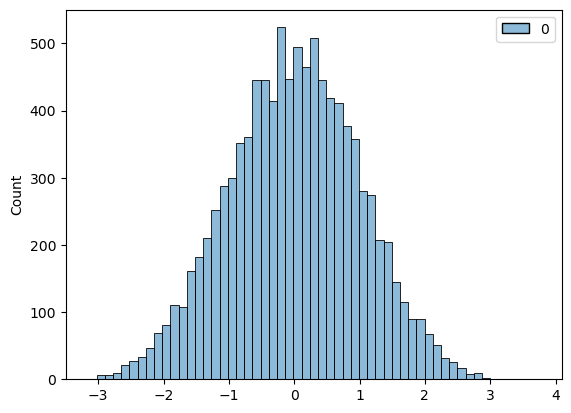

In [21]:
def box_cox(data,l):
    bxcx=[]
    for i in range(0,len(data)-1):
        if l == 0:
           x=np.log(data[i])
           bxcx.append(x)
        else:
            x=((data[i]**l)-1)/l
            bxcx.append(x)
        
    sns.histplot(bxcx) 
#box_cox(right_skewed_data,l=0.2814)
#bxcx_data,best_lambda=boxcox(right_skewed_data)
power_trans=PowerTransformer(method='box-cox')
bxcx_data=power_trans.fit_transform(right_skewed_data_reshape)

inverse_bxcx=power_trans.inverse_transform(bxcx_data)

sns.histplot(bxcx_data)

Quantile Transformation

<Axes: ylabel='Count'>

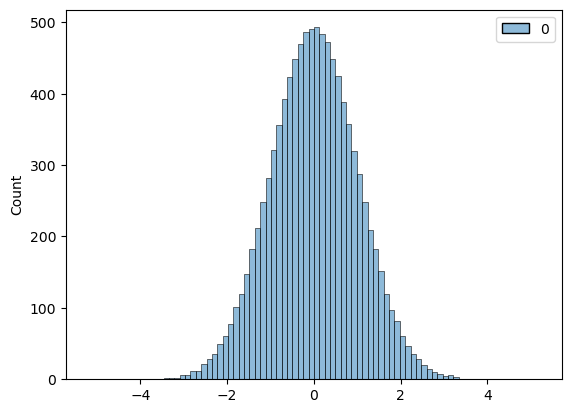

In [16]:
transformer=QuantileTransformer(output_distribution='normal')


transformed_data=transformer.fit_transform(right_skewed_data_reshape)

k=transformer.inverse_transform(transformed_data) 


sns.histplot(transformed_data)